In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read dataset 

In [2]:

ratings = pd.read_csv('./BookCrossing/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
print("Ratings dataset shape:", ratings.shape)

Ratings dataset shape: (1149780, 3)


## Exploratory data analysis

## Users

In [3]:
users = pd.read_csv('./BookCrossing/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
print("Users dataset shape:", users.shape)
print(users.isnull().mean())

Users dataset shape: (278858, 3)
userID      0.000000
Location    0.000000
Age         0.397199
dtype: float64


In [4]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
data = np.asarray(users["Location"].str.split(',').tolist())
print(data.shape)

(278858,)


Some key observations
- The "Location feature econdes information regarding city, state, and country"
- The Age featire contains some NaN values. Almost 40% of the users do NOT contain Age information.

In [6]:
data = users["Location"].str.split(',', 2, expand=True)
data.columns = ["City", "State", "Country"]

print("Unique Cities: {0} Embedding size: {1}".format(len(data.City.unique()), len(data.City.unique())** 0.25))
print("Unique State: {0} Embedding size: {1}".format(len(data.State.unique()), len(data.State.unique())** 0.25))
print("Unique Country: {0} Embedding size: {1}".format(len(data.Country.unique()), len(data.Country.unique())** 0.25))

# remove unecessary white spaces
data.City = data.City.str.strip()
data.State = data.State.str.strip()
data.Country = data.Country.str.strip()

# remove unecessary white spaces
data.City = data.City.str.lower()
data.State = data.State.str.lower()
data.Country = data.Country.str.lower()

Unique Cities: 32770 Embedding size: 13.454547936337105
Unique State: 6335 Embedding size: 8.921474835155655
Unique Country: 1277 Embedding size: 5.977887316637148


In [7]:
print(data.isnull().mean())

City       0.000000
State      0.000004
Country    0.000007
dtype: float64


In [8]:
users = pd.concat([users, data], axis=1)
users = users.drop(columns=["Location"], axis=1)
users.head()

,userID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [9]:
users.isnull().mean()

userID     0.000000
Age        0.397199
City       0.000000
State      0.000004
Country    0.000007
dtype: float64

In [10]:
users = users.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cb4725588>]],
      dtype=object)

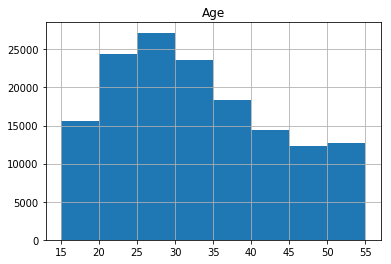

In [11]:
users.hist('Age', bins=[15,20,25,30,35,40,45,50,55])

In [12]:
# s = ' êàëóæñêàÿ îáë russia'
# printable = set(string.printable)
# s = ''.join(filter(lambda x: x in printable, s))
# print(s)

In [13]:
import string
print(string.punctuation)

def remove_punctuation(s):
    # remove non asci values
    printable = set(string.printable)
    s = ''.join(filter(lambda x: x in printable, s))
    # print(s)
    translator = str.maketrans('', '', string.punctuation)

    # This is an alternative that creates a dictionary mapping
    # of every character from string.punctuation to None (this will
    # also work)
    #translator = str.maketrans(dict.fromkeys(string.punctuation))

    # pass the translator to the string's translate method.
    s = s.translate(translator)
    
    translator = str.maketrans('', '', string.digits)
    r = s.translate(translator)
    
    #print(r)
    return r.strip()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
users.City = users.City.apply(remove_punctuation)
users.State = users.State.apply(remove_punctuation)
users.Country = users.Country.apply(remove_punctuation)

In [15]:
print("Unique Cities: {0} Embedding size: {1}".format(len(users.City.unique()), len(users.City.unique())** 0.25))
print("Unique State: {0} Embedding size: {1}".format(len(users.State.unique()), len(users.State.unique())** 0.25))
print("Unique Country: {0} Embedding size: {1}".format(len(users.Country.unique()), len(users.Country.unique())** 0.25))

print("Users dataset shape:", users.shape)
print(users.isnull().mean())

Unique Cities: 24627 Embedding size: 12.527167304113277
Unique State: 4281 Embedding size: 8.088841153825582
Unique Country: 681 Embedding size: 5.1084221342210725
Users dataset shape: (168094, 5)
userID     0.0
Age        0.0
City       0.0
State      0.0
Country    0.0
dtype: float64


## Books

In [16]:
books = pd.read_csv('./BookCrossing/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
print("Books dataset shape:", books.shape)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


Books dataset shape: (271360, 8)


/home/thallessilva/.virtualenvs/cv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
books = books[['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']]
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [18]:
books.isnull().mean()

ISBN                 0.000000
bookTitle            0.000000
bookAuthor           0.000004
yearOfPublication    0.000000
publisher            0.000007
dtype: float64

In [19]:
print("Unique bookTitle: {0} Embedding size: {1}".format(len(books.bookTitle.unique()), len(books.bookTitle.unique())** 0.25))
print("Unique bookAuthor: {0} Embedding size: {1}".format(len(books.bookAuthor.unique()), len(books.bookAuthor.unique())** 0.25))
print("Unique publisher: {0} Embedding size: {1}".format(len(books.publisher.unique()), len(books.publisher.unique())** 0.25))

# lower case bookTitle, bookAuthor and publisher columns
books.bookTitle = books.bookTitle.str.lower()
books.bookAuthor = books.bookAuthor.str.lower()
books.publisher = books.publisher.str.lower()

Unique bookTitle: 242135 Embedding size: 22.182699321349464
Unique bookAuthor: 102024 Embedding size: 17.87210003611629
Unique publisher: 16808 Embedding size: 11.38620529259572


In [20]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,classical mythology,mark p. o. morford,2002,oxford university press
1,0002005018,clara callan,richard bruce wright,2001,harperflamingo canada
2,0060973129,decision in normandy,carlo d'este,1991,harperperennial
3,0374157065,flu: the story of the great influenza pandemic...,gina bari kolata,1999,farrar straus giroux
4,0393045218,the mummies of urumchi,e. j. w. barber,1999,w. w. norton &amp; company


In [21]:
# drop the 6 cases containing NaN values
books = books.dropna()

In [22]:
def remove_non_ascii(s):
    printable = set(string.printable)
    s = ''.join(filter(lambda x: x in printable, s))
    return s.strip()

def remove_punctuation(s):
    translator = str.maketrans('', '', string.punctuation)
    # pass the translator to the string's translate method.
    s = s.translate(translator)
    return s.strip()

def remove_digits(s):
    translator = str.maketrans('', '', string.digits)
    s = s.translate(translator)
    return s.strip()

In [23]:
def remove_one_letter_word(record):
    new_record = ' '.join( [w for w in record.split() if len(w)>1] )
    return new_record.strip()
#books.bookAuthor = books.bookAuthor.apply(remove_one_letter_word)
#books.publisher = books.publisher.apply(remove_one_letter_word)

In [24]:
# some of the values in 'yearOfPublication' are string
books.yearOfPublication[books.yearOfPublication == 'DK Publishing Inc']

209538    DK Publishing Inc
221678    DK Publishing Inc
Name: yearOfPublication, dtype: object

In [25]:
def to_int(x):
    try:
        #print(int(x))
        return int(x)
    except:
        return np.nan

In [26]:
books.bookAuthor = books.bookAuthor.apply(remove_non_ascii)
books.bookAuthor = books.bookAuthor.apply(remove_digits)
books.bookAuthor = books.bookAuthor.apply(remove_punctuation)

books.publisher = books.publisher.apply(remove_non_ascii)
books.publisher = books.publisher.apply(remove_punctuation)

books.bookTitle = books.bookTitle.apply(remove_punctuation)

books.yearOfPublication = books.yearOfPublication.apply(pd.to_numeric, errors='coerce')
#books.yearOfPublication = books.yearOfPublication.apply(to_int)

In [27]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,classical mythology,mark p o morford,2002.0,oxford university press
1,0002005018,clara callan,richard bruce wright,2001.0,harperflamingo canada
2,0060973129,decision in normandy,carlo deste,1991.0,harperperennial
3,0374157065,flu the story of the great influenza pandemic ...,gina bari kolata,1999.0,farrar straus giroux
4,0393045218,the mummies of urumchi,e j w barber,1999.0,w w norton amp company


In [28]:
books.isnull().mean()

ISBN                 0.000000
bookTitle            0.000000
bookAuthor           0.000000
yearOfPublication    0.000011
publisher            0.000000
dtype: float64

In [29]:
books = books.dropna()
books.yearOfPublication = books.yearOfPublication.astype('int64')

In [30]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,classical mythology,mark p o morford,2002,oxford university press
1,0002005018,clara callan,richard bruce wright,2001,harperflamingo canada
2,0060973129,decision in normandy,carlo deste,1991,harperperennial
3,0374157065,flu the story of the great influenza pandemic ...,gina bari kolata,1999,farrar straus giroux
4,0393045218,the mummies of urumchi,e j w barber,1999,w w norton amp company


In [31]:
# for i in books.groupby('publisher')['publisher']:
#     print(i)

In [32]:
print("Unique bookTitle: {0} Embedding size: {1}".format(len(books.bookTitle.unique()), len(books.bookTitle.unique())** 0.25))
print("Unique bookAuthor: {0} Embedding size: {1}".format(len(books.bookAuthor.unique()), len(books.bookAuthor.unique())** 0.25))
print("Unique publisher: {0} Embedding size: {1}".format(len(books.publisher.unique()), len(books.publisher.unique())** 0.25))

Unique bookTitle: 237520 Embedding size: 22.07623691609413
Unique bookAuthor: 97991 Embedding size: 17.692799150988265
Unique publisher: 16264 Embedding size: 11.292935337432818


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cab431358>]],
      dtype=object)

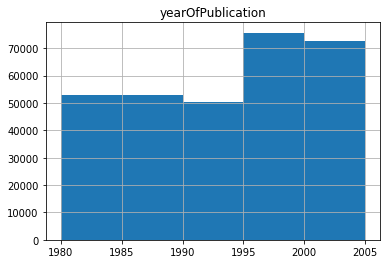

In [33]:
books.hist("yearOfPublication", bins=[1980, 1990, 1995, 2000, 2005])

## Ratings

In [34]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
ratings.bookRating.max()

10

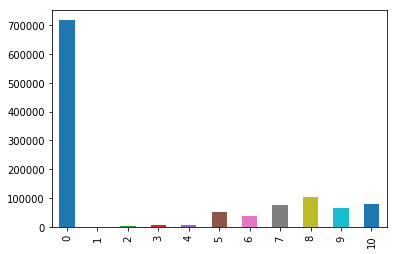

In [36]:
ratings.bookRating.value_counts(sort=False).plot("bar")

In [37]:
ratings.isnull().mean()

userID        0.0
ISBN          0.0
bookRating    0.0
dtype: float64

In [38]:
print(np.sum(ratings["bookRating"] > 0))
print(np.sum(ratings["bookRating"] == 0))

433671
716109


## Dataset

- Problem description: Predict whether of not a user will like a book. To do that we consider.
  - Ratings of 0 (dislike) - label = 0
  - Rating ranging from 1 to 10 (like) - label = 1

In [39]:
ratings.loc[ratings.bookRating == 0, 'label'] = 0
ratings.loc[ratings.bookRating > 0, 'label'] = 1

In [40]:
print(ratings.shape)

(1149780, 4)


In [41]:
# users.loc[users.userID == 276726]

In [42]:
# ratings.loc[ratings.userID == 14]

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [43]:
count1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(count1[count1 >= 50].index)]
count2 = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(count2[count2 >= 50].index)]

In [44]:
print(ratings.shape)

(768472, 4)


In [45]:
result = ratings.join(users.set_index('userID'), on='userID')
print(result.shape)
result.isnull().mean()

(768472, 8)


userID        0.000000
ISBN          0.000000
bookRating    0.000000
label         0.000000
Age           0.232491
City          0.232491
State         0.232491
Country       0.232491
dtype: float64

In [46]:
result = result.join(books.set_index('ISBN'), on='ISBN')
print(result.shape)

(768472, 12)


In [47]:
result.head()

,userID,ISBN,bookRating,label,Age,City,State,Country,bookTitle,bookAuthor,yearOfPublication,publisher
173,276847,0446364193,0,0.0,27.0,kln,nordrheinwestfalen,germany,along came a spider alex cross novels,james patterson,1993.0,warner books
174,276847,3257200552,5,1.0,27.0,kln,nordrheinwestfalen,germany,NaN,NaN,NaN,NaN
175,276847,3379015180,0,0.0,27.0,kln,nordrheinwestfalen,germany,schlafes bruder,robert schneider,1994.0,reclam leipzig
176,276847,3404145909,8,1.0,27.0,kln,nordrheinwestfalen,germany,der stein der kelten,michael phillips,2001.0,lbbe
177,276847,3404148576,8,1.0,27.0,kln,nordrheinwestfalen,germany,nordermoor,arnaldur indridason,2003.0,lbbe


In [48]:
TRAINING_VARS = ['City', 'State', 'Country', 'Age', 'bookTitle', 'bookAuthor', 'yearOfPublication']
TARGET_VAR = ['label']

result = result[TRAINING_VARS + TARGET_VAR]
result.head()

,City,State,Country,Age,bookTitle,bookAuthor,yearOfPublication,label
173,kln,nordrheinwestfalen,germany,27.0,along came a spider alex cross novels,james patterson,1993.0,0.0
174,kln,nordrheinwestfalen,germany,27.0,NaN,NaN,NaN,1.0
175,kln,nordrheinwestfalen,germany,27.0,schlafes bruder,robert schneider,1994.0,0.0
176,kln,nordrheinwestfalen,germany,27.0,der stein der kelten,michael phillips,2001.0,1.0
177,kln,nordrheinwestfalen,germany,27.0,nordermoor,arnaldur indridason,2003.0,1.0


In [49]:
result.isnull().mean()
# City                 0.245320
# State                0.245320
# Country              0.245320
# Age                  0.245320
# bookTitle            0.091732
# bookAuthor           0.091732
# yearOfPublication    0.091732
# label                0.000000
# dtype: float64

City                 0.232491
State                0.232491
Country              0.232491
Age                  0.232491
bookTitle            0.084641
bookAuthor           0.084641
yearOfPublication    0.084641
label                0.000000
dtype: float64

In [50]:
result = result.dropna()
print(result.shape)

(540629, 8)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cab2b49b0>]],
      dtype=object)

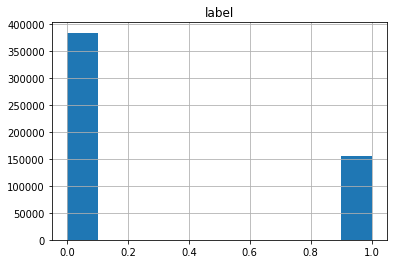

In [51]:
result.hist('label')

In [52]:
result.to_csv('./BookCrossing/data.csv', index=False)

In [53]:
print(result.isnull().sum())

City                 0
State                0
Country              0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
label                0
dtype: int64


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(result[TRAINING_VARS], result[TARGET_VAR], test_size=0.15, random_state=42)

In [56]:
# X_train.to_csv('./BookCrossing/X_train.csv', index = False)
# y_train.to_csv('./BookCrossing/y_train.csv', index = False)
# X_test.to_csv('./BookCrossing/X_test.csv', index = False)
# y_test.to_csv('./BookCrossing/y_test.csv', index = False)

In [57]:
print(X_train.shape)
print(X_train.isnull().sum())

(459534, 7)
City                 0
State                0
Country              0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
dtype: int64


In [58]:
result[TRAINING_VARS].isnull().sum()

City                 0
State                0
Country              0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
dtype: int64